# PageRank and Eigenvectors

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Representing undirected graphs by matrices

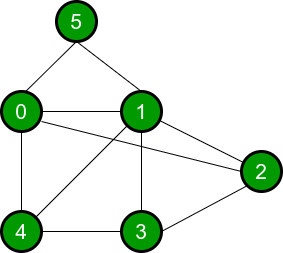

In [33]:
# Construct the adjacency matrix G based on the figure above.
# G[i, j] = 1 if there is a link from node j to node i, 0 otherwise.
# Since it's undirected, G[i, j] = G[j, i].
G = np.array([[0,1,1,0,1,1],
              [1,0,1,1,1,1],
              [1,1,0,1,0,0],
              [0,1,1,0,1,0],
              [1,1,0,1,0,0],
              [1,1,0,0,0,0]], dtype=float)

print("Matrix generated based on the network above is")
print(G)

Matrix generated based on the network above is
[[0. 1. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 0.]
 [1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]]


In [34]:
# Normalize the adjacency matrix G column-wise.
# Each column should sum to 1. G_N[i, j] represents the probability
# of transitioning from node j to node i.
def normalize_graph(G):
  G_normalized = G.copy() # Create a copy to avoid modifying the original G
  # Iterate through each column

  for i in range(G_normalized.shape[1]):
    col = G_normalized[:, i]
    # Calculate the sum of the column (number of outgoing links from node i)
    column_sum = np.sum(col)
    # Avoid division by zero for nodes with no outgoing links (dangling nodes)
    # Although in this specific undirected graph, every node has links.
    if column_sum != 0:
      # Divide each element in the column by the column sum
      G_normalized[:, i] = G_normalized[:, i] / column_sum

  return G_normalized

In [35]:
# Normalize the matrix G
G_N = normalize_graph(G)
print("The matrix after normalization is:")
print(G_N)

The matrix after normalization is:
[[0.         0.2        0.33333333 0.         0.33333333 0.5       ]
 [0.25       0.         0.33333333 0.33333333 0.33333333 0.5       ]
 [0.25       0.2        0.         0.33333333 0.         0.        ]
 [0.         0.2        0.33333333 0.         0.33333333 0.        ]
 [0.25       0.2        0.         0.33333333 0.         0.        ]
 [0.25       0.2        0.         0.         0.         0.        ]]


## Finding the importance vector

In [36]:
# Implement Power Iteration to find the PageRank vector.
# This  multiplies the normalized matrix G_N with a vector v
# until v converges.
def find_importance_vector(G_N):
  num_nodes = G_N.shape[0]
  # Initialize v_old with equal probability for each node (1/N)
  # Using ones() first and normalizing later is also common and works.
  v_old = np.ones(num_nodes) / num_nodes 
  
  # Convergence threshold
  tolerance = 0.000001 
  
  while True:
    # Perform the power iteration step: v_new = G_N * v_old
    v_new = G_N @ v_old 
    
    # Normalize v_new so its elements sum to 1 (making it a probability distribution)
    # This step is crucial for convergence and interpretation.
    v_new = v_new / np.sum(v_new) 
    
    # Check for convergence: if the change between v_old and v_new is small enough
    if np.linalg.norm(v_old - v_new) / np.linalg.norm(v_new) < tolerance:
      break # Exit the loop if converged
      
    # Update v_old for the next iteration
    v_old = v_new.copy() 

  # Reshape the final vector v_new into a column vector
  v = v_new.reshape(-1, 1) 
  return v

In [37]:
# Calculate the importance vector using the power iteration function
v = find_importance_vector(G_N)  
print(f"The important vector found is:\n{v}")

The important vector found is:
[[0.2000001 ]
 [0.25000004]
 [0.14999992]
 [0.15000006]
 [0.14999992]
 [0.09999995]]


In [38]:
# Compare the calculated vector 'v' with the known approximate solution 'v_hat'.
v_hat = np.array(
    [[0.2 ,0.25, 0.15, 0.15, 0.15, 0.1 ]] 
    ).T # Transpose to make it a column vector
print(f"Given v_hat is \n{v_hat}")

# Calculate the relative difference (Euclidean distance normalized by the norm of v_hat)
relative_dist = np.linalg.norm(v - v_hat) / np.linalg.norm(v_hat)

print(f"The relative dist between v and v_hat is {relative_dist}") 
# The distance should be very small, indicating convergence to the correct vector.

Given v_hat is 
[[0.2 ]
 [0.25]
 [0.15]
 [0.15]
 [0.15]
 [0.1 ]]
The relative dist between v and v_hat is 4.0106185108434787e-07


## 2.3 PageRank vector

In [39]:
# A new unnormalized adjacency matrix G (100x100) is given:
np.random.seed(2033) # for reproducibility
# Generate a random matrix with 0s and 1s
G_half = np.random.randint(0, 2, (100, 100))
# Make it symmetric (undirected graph) by G = G_half + G_half.T
G = (G_half + G_half.T)
# Ensure entries are only 0 or 1 (handle cases where G[i,j] became 2)
G = (np.sign(G)) 
# Convert to float for normalization
G = G.astype(np.float32) 
# Ensure no self-loops (diagonal elements should be 0)
for i in range(100):
  G[i, i] = 0.

# Check if the matrix is symmetric (should be 0)
print(np.linalg.norm(G - G.T)) 
print(G)

0.0
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 0. 1. ... 1. 1. 0.]]


In [45]:
# Compute the normalized matrix G_N for the 100x100 matrix G.
G_N = normalize_graph(G)

In [46]:
# Use NumPy's built-in function np.linalg.eig to find the eigenvector 
# corresponding to the eigenvalue = 1 (the principal eigenvector for PageRank).
from numpy.linalg import eig
w, V = eig(G_N) 
index = np.argmax(np.abs(w))
eigen_vector = V[:, index] 
print("Eigenvector found (while eigenvalue = 1) is: ")

print(eigen_vector)

Eigenvector found (while eigenvalue = 1) is: 
[-0.10590146 -0.09503977 -0.09232435 -0.10861688 -0.08825121 -0.09775519
 -0.09775519 -0.11269001 -0.10047061 -0.10047061 -0.09368206 -0.09639748
 -0.10454375 -0.11269001 -0.09368206 -0.10047061 -0.09368206 -0.09775519
 -0.10725917 -0.10318603 -0.10318603 -0.09639748 -0.10454375 -0.10318603
 -0.09503977 -0.09911291 -0.10047061 -0.10725917 -0.09639748 -0.10182832
 -0.10454375 -0.10861688 -0.08960892 -0.09232435 -0.10047061 -0.10725917
 -0.09503977 -0.09911291 -0.09368206 -0.09639748 -0.10182832 -0.10318603
 -0.10454375 -0.10454375 -0.09096663 -0.10590146 -0.10997459 -0.09775519
 -0.09911291 -0.09503977 -0.10861688 -0.10047061 -0.10454375 -0.10182832
 -0.09911291 -0.10047061 -0.09503977 -0.09503977 -0.10725917 -0.10318603
 -0.10318603 -0.10182832 -0.08825121 -0.09096663 -0.10182832 -0.08960892
 -0.10454375 -0.09639748 -0.09775519 -0.10590146 -0.09368206 -0.11269001
 -0.09911291 -0.09368206 -0.09232435 -0.09503977 -0.10454375 -0.10454375
 -0.0

In [47]:
# Convert the found eigenvector into the PageRank vector:
# 1. Take the absolute value (or real part, as imaginary parts should be negligible).
# 2. Normalize the vector so its elements sum to 1.
# Take the absolute value to handle potential negative scaling or negligible imaginary parts
v_abs = np.abs(eigen_vector) 
# Normalize the vector by dividing by the sum of its elements
v_PageRank = v_abs / np.sum(v_abs) 

# Reshape into a column vector for consistency
v_PageRank = v_PageRank.reshape(-1, 1) 

print("Page Rank Vector is:")
print(v_PageRank)

Page Rank Vector is:
[[0.01060936]
 [0.00952122]
 [0.00924919]
 [0.01088139]
 [0.00884113]
 [0.00979326]
 [0.00979326]
 [0.01128945]
 [0.01006529]
 [0.01006529]
 [0.0093852 ]
 [0.00965724]
 [0.01047334]
 [0.01128945]
 [0.0093852 ]
 [0.01006529]
 [0.0093852 ]
 [0.00979326]
 [0.01074538]
 [0.01033732]
 [0.01033732]
 [0.00965724]
 [0.01047334]
 [0.01033732]
 [0.00952122]
 [0.00992927]
 [0.01006529]
 [0.01074538]
 [0.00965724]
 [0.01020131]
 [0.01047334]
 [0.01088139]
 [0.00897715]
 [0.00924919]
 [0.01006529]
 [0.01074538]
 [0.00952122]
 [0.00992927]
 [0.0093852 ]
 [0.00965724]
 [0.01020131]
 [0.01033732]
 [0.01047334]
 [0.01047334]
 [0.00911317]
 [0.01060936]
 [0.01101741]
 [0.00979326]
 [0.00992927]
 [0.00952122]
 [0.01088139]
 [0.01006529]
 [0.01047334]
 [0.01020131]
 [0.00992927]
 [0.01006529]
 [0.00952122]
 [0.00952122]
 [0.01074538]
 [0.01033732]
 [0.01033732]
 [0.01020131]
 [0.00884113]
 [0.00911317]
 [0.01020131]
 [0.00897715]
 [0.01047334]
 [0.00965724]
 [0.00979326]
 [0.01060936]

In [43]:
# Compare the PageRank vector obtained from eigendecomposition (v_PageRank)
# with the one obtained from power iteration (imp_vec).
# Calculate the importance vector using the power iteration method
imp_vec = find_importance_vector(G_N)

# Calculate the relative distance between the two vectors
relative_dist = np.linalg.norm(imp_vec - v_PageRank) / np.linalg.norm(v_PageRank)

print(f"Relative Dist between imp_vec and v_PageRank is {relative_dist}") 
# This distance should be very small, showing both methods yield the same result.
print(f"importance vector is \n{imp_vec}")

Relative Dist between imp_vec and v_PageRank is 1.5466428924226021e-07
importance vector is 
[[0.01060936]
 [0.00952122]
 [0.00924918]
 [0.01088139]
 [0.00884113]
 [0.00979325]
 [0.00979325]
 [0.01128944]
 [0.01006529]
 [0.01006529]
 [0.0093852 ]
 [0.00965724]
 [0.01047334]
 [0.01128944]
 [0.0093852 ]
 [0.01006529]
 [0.0093852 ]
 [0.00979325]
 [0.01074538]
 [0.01033732]
 [0.01033732]
 [0.00965724]
 [0.01047334]
 [0.01033732]
 [0.00952122]
 [0.00992927]
 [0.01006529]
 [0.01074537]
 [0.00965724]
 [0.01020131]
 [0.01047334]
 [0.01088139]
 [0.00897715]
 [0.00924918]
 [0.01006529]
 [0.01074537]
 [0.00952122]
 [0.00992927]
 [0.0093852 ]
 [0.00965724]
 [0.01020131]
 [0.01033732]
 [0.01047334]
 [0.01047334]
 [0.00911317]
 [0.01060936]
 [0.01101741]
 [0.00979325]
 [0.00992927]
 [0.00952122]
 [0.01088139]
 [0.01006529]
 [0.01047334]
 [0.01020131]
 [0.00992927]
 [0.01006529]
 [0.00952122]
 [0.00952122]
 [0.01074537]
 [0.01033732]
 [0.01033732]
 [0.01020131]
 [0.00884113]
 [0.00911317]
 [0.0102013

In [48]:
# Find the indices of the 5 most important webpages (highest PageRank scores).
# np.argsort returns indices that would sort the array. 
# Use negative v_PageRank.flatten() to sort in descending order.
# Take the first 5 indices.
ind_top_5 = np.argsort(-v_PageRank.flatten())[0:5] 

print("Top 5 indices are: ")
print(ind_top_5)

Top 5 indices are: 
[ 7 13 83 71 80]
